In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from swarm_sim import *

%matplotlib inline 

## Transformation des données en graphe

In [2]:
PATH = 'Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

for i in range(0,100):
    sat = df.iloc[3*i : 3*i+3].copy()
    sat['coords'] = ['x','y','z']
    satellites[i] = sat.set_index('coords', drop=True)

satellites[0]


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


In [ ]:
RANGE = 20000 #CHANGER AU BESOIN

list_satellites = []

for i in range(len(satellites)):
    obj_sat = Node.__new__(Node)
    obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])
    list_satellites.append(obj_sat)

swarm = Swarm.__new__(Swarm)
swarm.__init__(RANGE, list_satellites)
graph = swarm.swarm_to_nxgraph()

174
100


/tmp/ipykernel_20443/409506994.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])


In [23]:
print(graph.number_of_edges())
print(graph.number_of_nodes())
print(np.mean([d for _, d in graph.degree()]))
print(dict(nx.all_pairs_shortest_path_length(graph)))

174
100
3.48
{0: {0: 0, 19: 1, 95: 1, 70: 2, 73: 2, 42: 2, 75: 2, 79: 2, 33: 3, 7: 3, 9: 3, 78: 3, 17: 3, 50: 3, 22: 3, 57: 3, 90: 3, 27: 3, 5: 4, 6: 4, 11: 4, 18: 4, 23: 4, 24: 4, 40: 4, 55: 4, 63: 4, 67: 4, 71: 4, 84: 4, 87: 4, 94: 4, 97: 4, 1: 5, 21: 5, 30: 5, 31: 5, 41: 5, 45: 5, 58: 5, 68: 5, 74: 5, 81: 5, 8: 6, 15: 6, 39: 6, 60: 6, 64: 6, 66: 6, 72: 6, 77: 6, 65: 7, 76: 7, 56: 7, 25: 7, 62: 7, 32: 8, 69: 8, 12: 8}, 1: {1: 0, 18: 1, 74: 1, 15: 1, 6: 2, 22: 2, 33: 3, 68: 3, 70: 3, 45: 3, 23: 3, 87: 3, 90: 3, 30: 3, 8: 4, 9: 4, 11: 4, 19: 4, 21: 4, 27: 4, 39: 4, 42: 4, 50: 4, 60: 4, 66: 4, 71: 4, 72: 4, 73: 4, 75: 4, 77: 4, 78: 4, 0: 5, 5: 5, 7: 5, 17: 5, 24: 5, 40: 5, 41: 5, 56: 5, 57: 5, 62: 5, 65: 5, 67: 5, 76: 5, 84: 5, 95: 5, 97: 5, 12: 6, 32: 6, 55: 6, 63: 6, 69: 6, 79: 6, 94: 6, 81: 7, 58: 7, 31: 7, 64: 8, 25: 9}, 2: {2: 0}, 3: {3: 0}, 4: {4: 0}, 5: {5: 0, 97: 1, 71: 1, 40: 1, 41: 1, 11: 1, 78: 1, 50: 1, 24: 1, 33: 2, 70: 2, 9: 2, 42: 2, 17: 2, 84: 2, 55: 2, 90: 2, 27: 2, 7: 

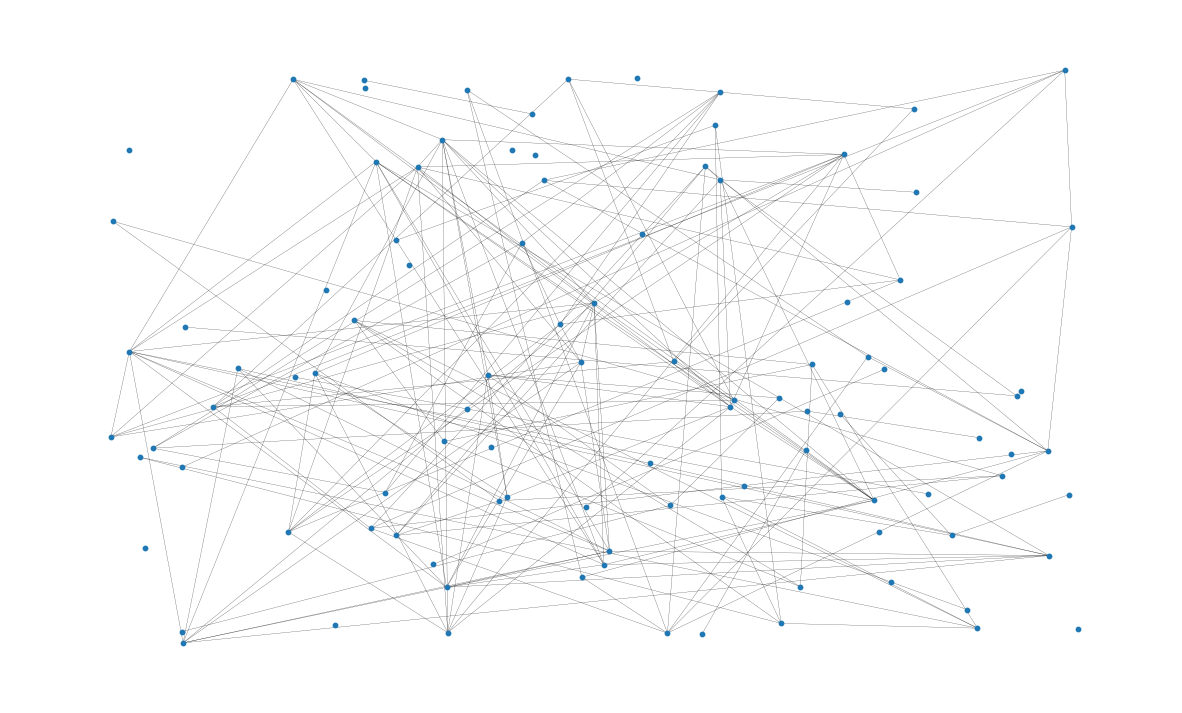

In [7]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(graph, pos=nx.random_layout(graph), ax=ax, **plot_options)

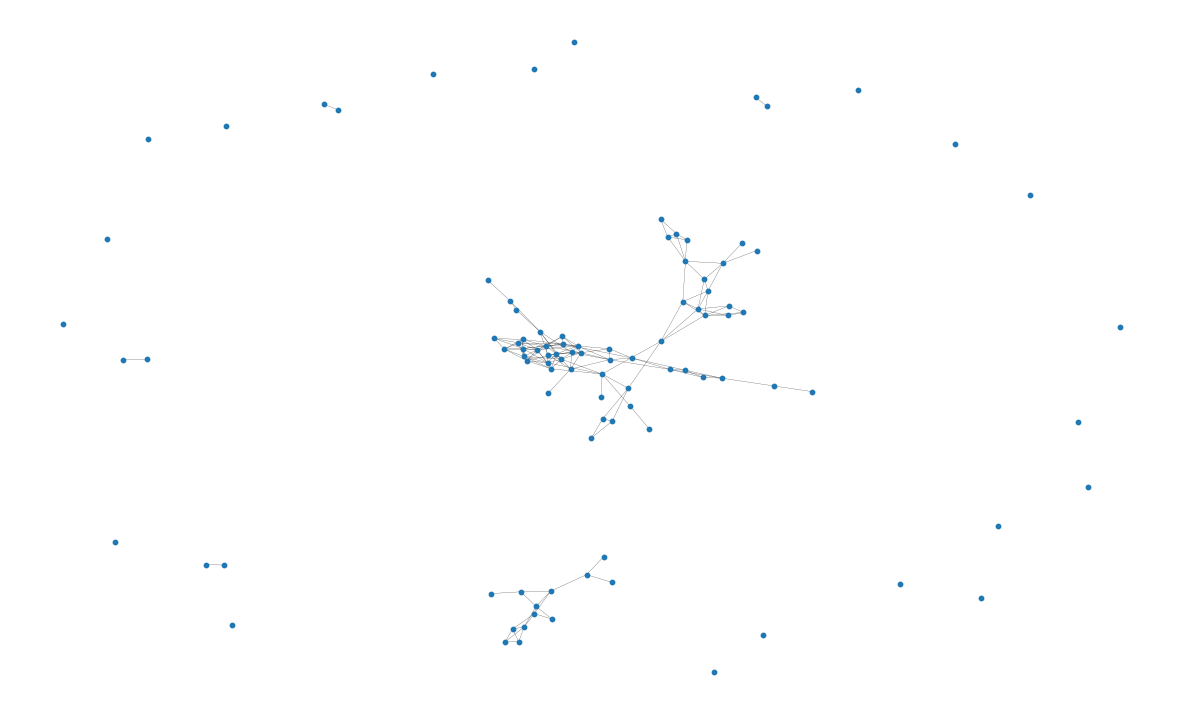

In [13]:
pos = nx.spring_layout(graph)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(graph, pos=pos, ax=ax, **plot_options)